In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import math
import numpy as np
import datetime as dt
import calendar
import seaborn as sns
from matplotlib import pyplot
import joypy
%matplotlib inline

C:\Users\riznet\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Dataset preparation

In [2]:
#Water amount through Verhnelebyazhe observation point
verhnelebyazhe = pd.read_csv('c:\VOLGA.csv', encoding = 'utf-8', sep=';')
verhnelebyazhe = verhnelebyazhe.drop('Total', axis=1)
verhnelebyazhe.replace(0, np.nan, inplace=True)
verhnelebyazhe.interpolate(inplace=True)

#Transform dataset with two columns
verhnelebyazhe_edited = pd.DataFrame
verhnelebyazhe_edited = verhnelebyazhe.set_index(verhnelebyazhe.pop('Year').astype(str)).stack().reset_index(name='Volume')
verhnelebyazhe_edited['Year'] = verhnelebyazhe_edited.pop('level_1')+ '-' + verhnelebyazhe_edited['Year']
verhnelebyazhe_edited.set_index('Year', inplace=True)

#Volzhkaya dam water discharge
volzhskaya = pd.read_csv('C:/Users/riznet/1volzhsk.csv', encoding = 'utf-8', sep=';')
volzhskaya['date']  = pd.to_datetime(volzhskaya.date, errors='coerce', format='%Y-%m-%d')
volzhskaya.index = volzhskaya.date
#Group by month
s = volzhskaya.resample('M', on='date')['discharge'].sum()
volzhskaya_edited=pd.DataFrame(s)

#Creating new dataset for inflow prediction after dec-2016
dataset = pd.DataFrame(volzhskaya_edited.loc['2013-04-29':'2016-12-31', 'discharge'])
dataset['discharge'] = round(dataset.discharge / 10000,2)
dataset.reset_index(inplace=True)

income = pd.DataFrame(verhnelebyazhe_edited.loc['Apr-2013':'Dec-2016', 'Volume'])
income.reset_index(inplace=True)

dataset['income'] = income.Volume

Text(0.5, 1.0, 'Linear relationship between Dam discharge and Delta inflow')

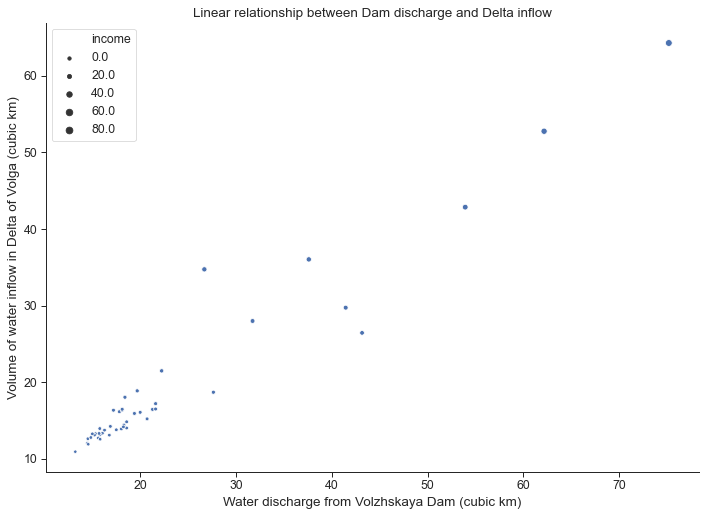

In [3]:
#Checking values to linear relationship
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(style='ticks', context='paper',font_scale=1.4, rc={"lines.linewidth": 1})
#plt.style.use('dark_background')

ax = sns.scatterplot(x="discharge", y="income",
                size="income",
                palette="YlOrBr",
                data=dataset)
sns.despine()
ax.set(xlabel='Water discharge from Volzhskaya Dam (cubic km)', ylabel='Volume of water inflow in Delta of Volga (cubic km)')
plt.title("Linear relationship between Dam discharge and Delta inflow")

In [4]:
#Preparing linear regression model
model = LinearRegression()
X = pd.DataFrame(dataset.discharge)
Y = pd.DataFrame(dataset.income)
model.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [5]:
#Metrics
model.score(X, Y)

0.9318787632998463

# Prediction missed data of Delta inflow values from 1st of Jan 2017 to June 2021

In [6]:
#Preparing independing values dataset
volzhskaya_edited['discharge_round'] = round(volzhskaya_edited.discharge / 10000,2)

In [7]:
#Select values for prediction by required date
Xn = pd.DataFrame(volzhskaya_edited.loc['2017-01-31':'2021-06-30', 'discharge_round'])

In [8]:
#Delta inflow prediction
Xp = pd.DataFrame(model.predict(Xn))

In [27]:
#Creation dataset with predicted values of Delta inflow
predictedDS = pd.DataFrame(volzhskaya_edited.loc['2013-04-30':'2021-06-30','discharge_round'])
predictedDS.reset_index(inplace=True)
dfConcat1 = pd.DataFrame(income.Volume)
dfConcat2['vol'] = pd.DataFrame(round(Xp,2))
concated = pd.DataFrame(pd.concat([dfConcat1.loc['0':'44', 'Volume'], dfConcat2.loc['0':'53', 'vol']], axis=0))
concated.reset_index(inplace=True)
concated.drop('index', axis=1, inplace=True)
predictedDS['income'] = concated
predictedDS.index = predictedDS.date
predictedDS.drop('date', axis=1, inplace=True)

Text(0.5, 1.0, 'Volga level in Astrakhan city between 18 April 2004 - 13 August 2021')

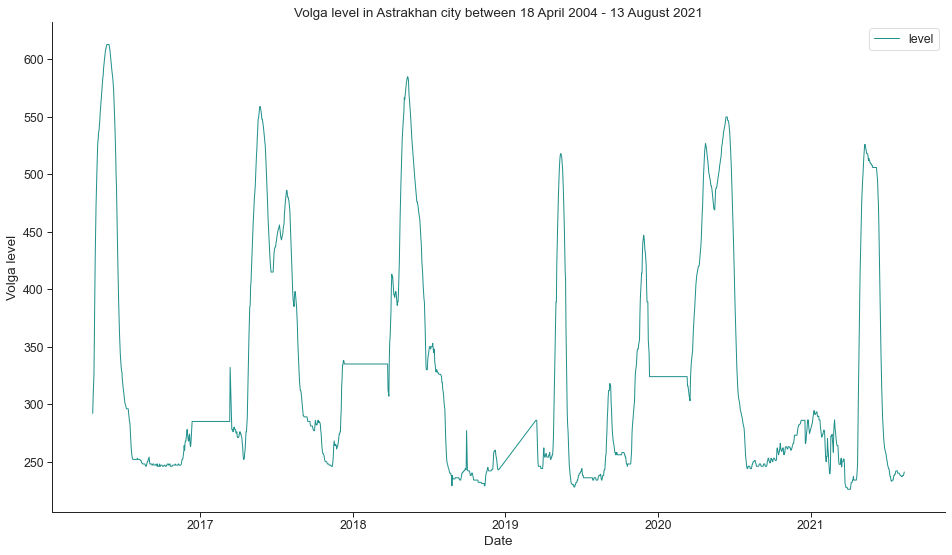

In [10]:
sns.set(rc={'figure.figsize':(16,9)})
sns.set(style='ticks', context='paper',font_scale=1.4, rc={"lines.linewidth": 1})
#plt.style.use('dark_background')

#data = predictedDS
#data = data.rolling(50).mean()

ax = sns.lineplot(data=level, palette="viridis", linewidth=1)
sns.despine()
ax.set(xlabel='Date', ylabel='Volga level')
plt.title("Volga level in Astrakhan city between 18 April 2004 - 13 August 2021")

In [7]:
level = pd.read_csv('volga_level.csv')
level['date'] = pd.to_datetime(level['date'], format = '%Y-%m-%d')
level.set_index('date', inplace=True)

In [9]:
level

,level
date,
2016-04-18,292.0
2016-04-19,306.0
2016-04-21,326.0
2016-04-22,350.0
2016-04-22,371.0
...,...
2021-08-09,238.0
2021-08-10,238.0
2021-08-11,238.0


In [30]:
data

,date,discharge,income
0,2013-04-30,31.72,27.99
1,2013-05-31,62.15,52.76
2,2013-06-30,37.59,36.03
3,2013-07-31,17.82,16.15
4,2013-08-31,16.05,13.34
5,2013-09-30,14.53,12.62
6,2013-10-31,15.81,13.18
7,2013-11-30,18.30,14.41
8,2013-12-31,21.60,17.20
9,2014-01-31,21.28,16.45


In [29]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(style='ticks', context='paper',font_scale=1.4, rc={"lines.linewidth": 1})
#plt.style.use('dark_background')

data = dataset
#data = data.rolling(50).mean()

ax = sns.lineplot(data=data, palette="viridis", linewidth=1)
sns.despine()
ax.set(xlabel='Date', ylabel='Volume of water amount')
plt.title("Colors vs Values")

TypeError: cannot astype a datetimelike from [datetime64[ns]] to [float64]

In [495]:
predictedDS

,discharge_round,income,wat_consumption
date,,,
2013-04-30,31.72,27.99,-3.73
2013-05-31,62.15,52.76,-9.39
2013-06-30,37.59,36.03,-1.56
2013-07-31,17.82,16.15,-1.67
2013-08-31,16.05,13.34,-2.71
...,...,...,...
2021-02-28,14.12,12.02,-2.10
2021-03-31,15.41,13.07,-2.34
2021-04-30,28.67,23.88,-4.79


In [499]:
fig, axes = joypy.joyplot(predictedDS, by="year", column="wat_consumption", range_style='own', 
                          grid="y", linewidth=1, legend=False, fade=True, figsize=(6,5),
                          title="Global daily temperature 1880-2014 \n(°C above 1950-80 average)",
                          kind="counts", bins=20)

KeyError: 'year'